trying to go back to the smaller dataset and improve the accuracy

In [123]:
import matplotlib.pyplot as plt
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, LSTM, Embedding, Dropout, Conv1D, GlobalMaxPooling1D, Flatten
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import Adam
from keras.callbacks import EarlyStopping

In [124]:

# Load the JSONL file into a pandas DataFrame
NTA = pd.read_json('NTA_Dataset.jsonl', lines=True)

# Extract the text and label columns
text = NTA['prompt'].values
labels = NTA['completion'].values

# Add a new column containing the first three letters of each completion field
NTA['verdict'] = ["NTA" for completion in labels]

# Remove the completion column
NTA.drop('completion', axis=1, inplace=True)

# Load the JSONL file into a pandas DataFrame
YTA = pd.read_json('YTA_Dataset.jsonl', lines=True)

# Extract the text and label columns
text = YTA['prompt'].values
labels = YTA['completion'].values

# Add a new column containing the first three letters of each completion field
YTA['verdict'] = ["YTA" for completion in labels]

# Remove the completion column
YTA.drop('completion', axis=1, inplace=True)

asshole = pd.DataFrame()
asshole = pd.concat([YTA, NTA], axis=0)
# asshole = asshole.sample(frac=1)
asshole

,prompt,verdict
0,My girlfriend (24F) is a very active person. S...,YTA
1,Two of my daughters are getting married on the...,YTA
2,We're from Iowa. Granted nothing ever happened...,YTA
3,I have always tried to teach my daughter to be...,YTA
4,"Captain should say it all, I’m the male in thi...",YTA
...,...,...
5309,Me and her (f) have been friends for a while b...,NTA
5310,On the last day before lock down I called in t...,NTA
5311,My friend was ranting to me about his tinder e...,NTA
5312,I've been laid off and have spent a lot of tim...,NTA


In [125]:


#  tokenize the text data using Keras' Tokenizer class.
tokenizer = Tokenizer(num_words=5000, oov_token="<OOV>")
text = []
lengthsY = []
lengthsN = []
for index, row in asshole.iterrows():
    words = row["prompt"].split()
    if row['verdict'] == 'YTA':
        lengthsY.append(len(row['prompt'].split()))
    else:
        lengthsN.append(len(row['prompt'].split()))
    text.append(words)
print(len(text))

tokenizer.fit_on_texts(text)
sequences = tokenizer.texts_to_sequences(text)

# pad the sequences to ensure that they are all of the same length.
padded_sequences = pad_sequences(sequences, maxlen=100)

# convert the labels to numerical values (0 for NTA and 1 for YTA).
labels = pd.get_dummies(asshole['verdict'], drop_first=True)
print(len(padded_sequences), len(labels))
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, labels, test_size=0.2, random_state=42)


7776
7776 7776


In [126]:
# the original model
model = Sequential()
model.add(Embedding(5000, 64, input_length=100))
model.add(LSTM(64))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history1 = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=64)



Epoch 1/10
98/98 [==============================] - 14s 126ms/step - loss: 0.6117 - accuracy: 0.6863 - val_loss: 0.5685 - val_accuracy: 0.6934
Epoch 2/10
98/98 [==============================] - 13s 133ms/step - loss: 0.4702 - accuracy: 0.7839 - val_loss: 0.4887 - val_accuracy: 0.7821
Epoch 3/10
98/98 [==============================] - 14s 144ms/step - loss: 0.3018 - accuracy: 0.8754 - val_loss: 0.5059 - val_accuracy: 0.7931
Epoch 4/10
98/98 [==============================] - 12s 128ms/step - loss: 0.1914 - accuracy: 0.9293 - val_loss: 0.5071 - val_accuracy: 0.8438
Epoch 5/10
98/98 [==============================] - 11s 112ms/step - loss: 0.1125 - accuracy: 0.9656 - val_loss: 0.5836 - val_accuracy: 0.8593
Epoch 6/10
98/98 [==============================] - 11s 116ms/step - loss: 0.0629 - accuracy: 0.9807 - val_loss: 0.6117 - val_accuracy: 0.8638
Epoch 7/10
98/98 [==============================] - 15s 152ms/step - loss: 0.0606 - accuracy: 0.9817 - val_loss: 0.6015 - val_accuracy: 0.8631

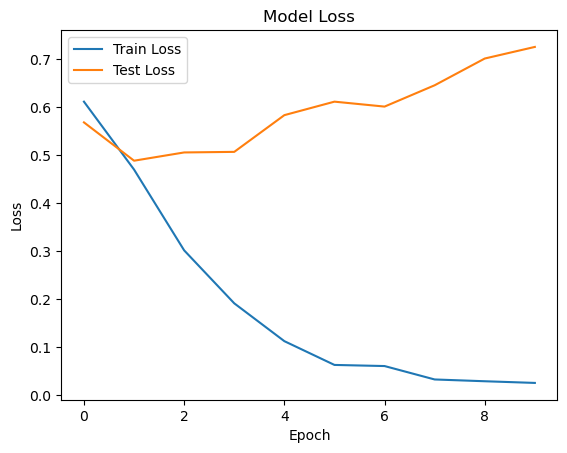

In [127]:
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train Loss','Test Loss'], loc='upper left')
plt.savefig('1OG.png', bbox_inches='tight')
plt.show()

TRYING WITH MORE EPOCHS

In [128]:


#  tokenize the text data using Keras' Tokenizer class.
tokenizer = Tokenizer(num_words=5000, oov_token="<OOV>")
text = []
lengthsY = []
lengthsN = []
for index, row in asshole.iterrows():
    words = row["prompt"].split()
    if row['verdict'] == 'YTA':
        lengthsY.append(len(row['prompt'].split()))
    else:
        lengthsN.append(len(row['prompt'].split()))
    text.append(words)
print(len(text))

tokenizer.fit_on_texts(text)
sequences = tokenizer.texts_to_sequences(text)

# pad the sequences to ensure that they are all of the same length.
padded_sequences = pad_sequences(sequences, maxlen=100)

# convert the labels to numerical values (0 for NTA and 1 for YTA).
labels = pd.get_dummies(asshole['verdict'], drop_first=True)
print(len(padded_sequences), len(labels))
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, labels, test_size=0.2, random_state=42)

# build the model
model = Sequential()
model.add(Embedding(5000, 64, input_length=100))
model.add(LSTM(64))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history2 = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=30, batch_size=64)



7776
7776 7776
Epoch 1/30
98/98 [==============================] - 21s 174ms/step - loss: 0.6072 - accuracy: 0.6942 - val_loss: 0.5556 - val_accuracy: 0.7166
Epoch 2/30
98/98 [==============================] - 13s 129ms/step - loss: 0.4500 - accuracy: 0.8014 - val_loss: 0.4737 - val_accuracy: 0.7898
Epoch 3/30
98/98 [==============================] - 14s 140ms/step - loss: 0.2978 - accuracy: 0.8822 - val_loss: 0.4654 - val_accuracy: 0.7937
Epoch 4/30
98/98 [==============================] - 14s 141ms/step - loss: 0.1980 - accuracy: 0.9341 - val_loss: 0.4576 - val_accuracy: 0.8458
Epoch 5/30
98/98 [==============================] - 14s 146ms/step - loss: 0.1299 - accuracy: 0.9614 - val_loss: 0.4862 - val_accuracy: 0.8567
Epoch 6/30
98/98 [==============================] - 13s 136ms/step - loss: 0.1002 - accuracy: 0.9715 - val_loss: 0.5188 - val_accuracy: 0.8528
Epoch 7/30
98/98 [==============================] - 11s 116ms/step - loss: 0.0734 - accuracy: 0.9788 - val_loss: 0.5638 - val_a

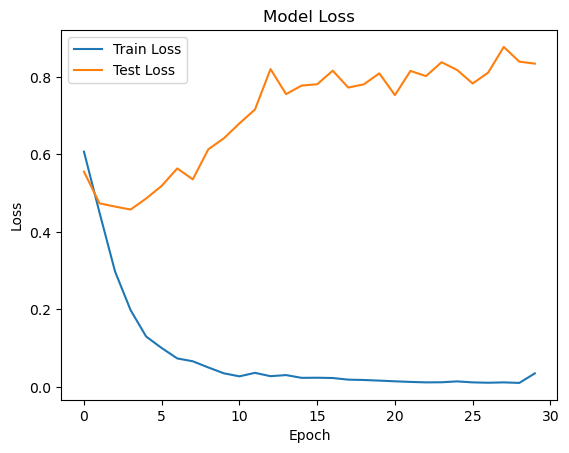

In [129]:
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train Loss','Test Loss'], loc='upper left')
plt.savefig('OG2moreEpochs.png', bbox_inches='tight')
plt.show()

TODO: trying decreasing the learning rate, add drop out, add another dense layer, change input length size

In [130]:
# attempting the learning rate alteration

In [131]:
# build the model
model = Sequential()
model.add(Embedding(5000, 64, input_length=100))
model.add(LSTM(64))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history3 = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=30, batch_size=64)

Epoch 1/30
98/98 [==============================] - 22s 187ms/step - loss: 0.6653 - accuracy: 0.6801 - val_loss: 0.6329 - val_accuracy: 0.6677
Epoch 2/30
98/98 [==============================] - 15s 155ms/step - loss: 0.6113 - accuracy: 0.6873 - val_loss: 0.6188 - val_accuracy: 0.6677
Epoch 3/30
98/98 [==============================] - 17s 170ms/step - loss: 0.5738 - accuracy: 0.6875 - val_loss: 0.5756 - val_accuracy: 0.6716
Epoch 4/30
98/98 [==============================] - 11s 110ms/step - loss: 0.5069 - accuracy: 0.7068 - val_loss: 0.5657 - val_accuracy: 0.6973
Epoch 5/30
98/98 [==============================] - 14s 148ms/step - loss: 0.4407 - accuracy: 0.7675 - val_loss: 0.5325 - val_accuracy: 0.7468
Epoch 6/30
98/98 [==============================] - 15s 159ms/step - loss: 0.3882 - accuracy: 0.8103 - val_loss: 0.5466 - val_accuracy: 0.7603
Epoch 7/30
98/98 [==============================] - 16s 165ms/step - loss: 0.3450 - accuracy: 0.8463 - val_loss: 0.5806 - val_accuracy: 0.7770

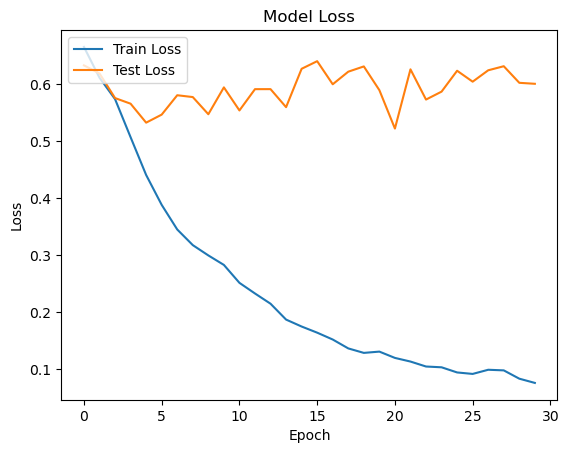

In [132]:
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train Loss','Test Loss'], loc='upper left')
plt.savefig('OG3decreaseLR.png', bbox_inches='tight')
plt.show()


That showed a little bit of improvement, so we're trying to decrease the learning rate even more

In [133]:
# build the model
model = Sequential()
model.add(Embedding(5000, 64, input_length=100))
model.add(LSTM(64))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer=Adam(learning_rate=0.00001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history4 = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=30, batch_size=64)

Epoch 1/30
98/98 [==============================] - 26s 200ms/step - loss: 0.6907 - accuracy: 0.6651 - val_loss: 0.6892 - val_accuracy: 0.6677
Epoch 2/30
98/98 [==============================] - 16s 166ms/step - loss: 0.6869 - accuracy: 0.6873 - val_loss: 0.6856 - val_accuracy: 0.6677
Epoch 3/30
98/98 [==============================] - 18s 182ms/step - loss: 0.6824 - accuracy: 0.6873 - val_loss: 0.6811 - val_accuracy: 0.6677
Epoch 4/30
98/98 [==============================] - 16s 158ms/step - loss: 0.6764 - accuracy: 0.6873 - val_loss: 0.6748 - val_accuracy: 0.6677
Epoch 5/30
98/98 [==============================] - 14s 142ms/step - loss: 0.6672 - accuracy: 0.6873 - val_loss: 0.6643 - val_accuracy: 0.6677
Epoch 6/30
98/98 [==============================] - 13s 132ms/step - loss: 0.6487 - accuracy: 0.6873 - val_loss: 0.6407 - val_accuracy: 0.6677
Epoch 7/30
98/98 [==============================] - 15s 148ms/step - loss: 0.6198 - accuracy: 0.6873 - val_loss: 0.6311 - val_accuracy: 0.6677

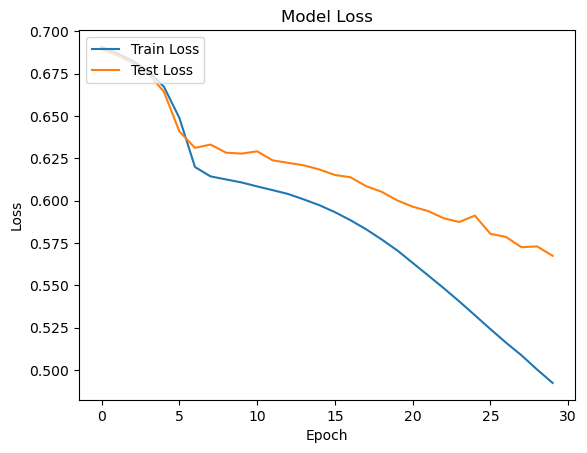

In [134]:
plt.plot(history4.history['loss'])
plt.plot(history4.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train Loss','Test Loss'], loc='upper left')
plt.savefig('OG4moreDecreaseLR.png', bbox_inches='tight')
plt.show()


Try with 100 epochs and try messing with the window length (50, 200, 300) and see if that affects anything

In [135]:
# build the model
model = Sequential()
model.add(Embedding(5000, 64, input_length=100))
model.add(LSTM(64))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer=Adam(learning_rate=0.00001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history5 = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=64)

Epoch 1/100
98/98 [==============================] - 13s 119ms/step - loss: 0.6905 - accuracy: 0.6590 - val_loss: 0.6892 - val_accuracy: 0.6677
Epoch 2/100
98/98 [==============================] - 11s 110ms/step - loss: 0.6864 - accuracy: 0.6873 - val_loss: 0.6855 - val_accuracy: 0.6677
Epoch 3/100
98/98 [==============================] - 10s 98ms/step - loss: 0.6819 - accuracy: 0.6873 - val_loss: 0.6811 - val_accuracy: 0.6677
Epoch 4/100
98/98 [==============================] - 12s 121ms/step - loss: 0.6764 - accuracy: 0.6873 - val_loss: 0.6756 - val_accuracy: 0.6677
Epoch 5/100
98/98 [==============================] - 12s 125ms/step - loss: 0.6689 - accuracy: 0.6873 - val_loss: 0.6676 - val_accuracy: 0.6677
Epoch 6/100
98/98 [==============================] - 15s 154ms/step - loss: 0.6566 - accuracy: 0.6873 - val_loss: 0.6537 - val_accuracy: 0.6677
Epoch 7/100
98/98 [==============================] - 14s 147ms/step - loss: 0.6327 - accuracy: 0.6873 - val_loss: 0.6315 - val_accuracy: 

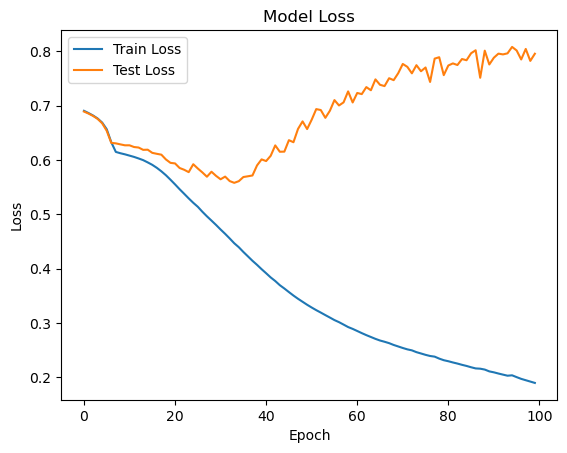

In [136]:
plt.plot(history5.history['loss'])
plt.plot(history5.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train Loss','Test Loss'], loc='upper left')
plt.savefig('OG5lowLRMoreEpochs.png', bbox_inches='tight')
plt.show()


keeping the large epochs and but raising the learning rate a little

In [137]:
# build the model
model = Sequential()
model.add(Embedding(5000, 64, input_length=100))
model.add(LSTM(64))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history6 = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=64)

Epoch 1/100
98/98 [==============================] - 16s 142ms/step - loss: 0.6659 - accuracy: 0.6870 - val_loss: 0.6335 - val_accuracy: 0.6677
Epoch 2/100
98/98 [==============================] - 12s 119ms/step - loss: 0.6134 - accuracy: 0.6873 - val_loss: 0.6235 - val_accuracy: 0.6677
Epoch 3/100
98/98 [==============================] - 14s 139ms/step - loss: 0.5875 - accuracy: 0.6873 - val_loss: 0.5923 - val_accuracy: 0.6677
Epoch 4/100
98/98 [==============================] - 18s 179ms/step - loss: 0.5262 - accuracy: 0.6915 - val_loss: 0.5490 - val_accuracy: 0.6748
Epoch 5/100
98/98 [==============================] - 14s 139ms/step - loss: 0.4584 - accuracy: 0.7257 - val_loss: 0.5296 - val_accuracy: 0.7089
Epoch 6/100
98/98 [==============================] - 17s 175ms/step - loss: 0.4024 - accuracy: 0.7879 - val_loss: 0.5219 - val_accuracy: 0.7661
Epoch 7/100
98/98 [==============================] - 10s 107ms/step - loss: 0.3711 - accuracy: 0.8310 - val_loss: 0.5355 - val_accuracy:

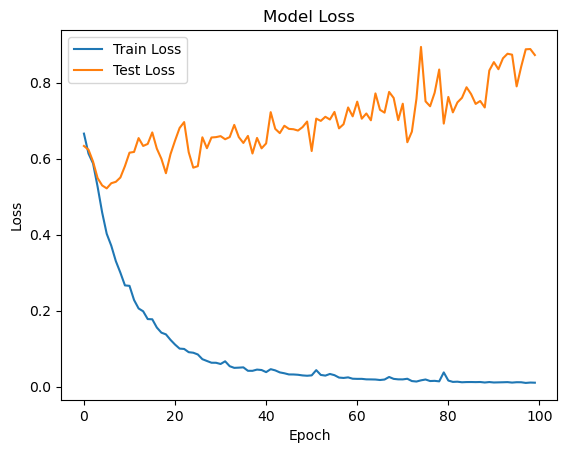

In [138]:
plt.plot(history6.history['loss'])
plt.plot(history6.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train Loss','Test Loss'], loc='upper left')
plt.savefig('OG6lMoreEpochsIncreaseLR.png', bbox_inches='tight')
plt.show()


adding another dense layer and lowering the learning rate back down - raising the learning rate made the graph diverge more

In [139]:
# build the model
model = Sequential()
model.add(Embedding(5000, 64, input_length=100))
model.add(LSTM(64))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer=Adam(learning_rate=0.00001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history7 = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=64)

Epoch 1/100
98/98 [==============================] - 18s 166ms/step - loss: 0.6917 - accuracy: 0.6513 - val_loss: 0.6904 - val_accuracy: 0.6671
Epoch 2/100
98/98 [==============================] - 15s 156ms/step - loss: 0.6885 - accuracy: 0.6873 - val_loss: 0.6872 - val_accuracy: 0.6677
Epoch 3/100
98/98 [==============================] - 10s 107ms/step - loss: 0.6843 - accuracy: 0.6873 - val_loss: 0.6829 - val_accuracy: 0.6677
Epoch 4/100
98/98 [==============================] - 13s 132ms/step - loss: 0.6786 - accuracy: 0.6873 - val_loss: 0.6769 - val_accuracy: 0.6677
Epoch 5/100
98/98 [==============================] - 11s 110ms/step - loss: 0.6703 - accuracy: 0.6873 - val_loss: 0.6680 - val_accuracy: 0.6677
Epoch 6/100
98/98 [==============================] - 12s 123ms/step - loss: 0.6566 - accuracy: 0.6873 - val_loss: 0.6519 - val_accuracy: 0.6677
Epoch 7/100
98/98 [==============================] - 11s 110ms/step - loss: 0.6297 - accuracy: 0.6873 - val_loss: 0.6340 - val_accuracy:

Epoch 58/100
98/98 [==============================] - 12s 118ms/step - loss: 0.2866 - accuracy: 0.8775 - val_loss: 0.6267 - val_accuracy: 0.7943
Epoch 59/100
98/98 [==============================] - 10s 99ms/step - loss: 0.2814 - accuracy: 0.8822 - val_loss: 0.6424 - val_accuracy: 0.7886
Epoch 60/100
98/98 [==============================] - 12s 119ms/step - loss: 0.2772 - accuracy: 0.8860 - val_loss: 0.6350 - val_accuracy: 0.7937
Epoch 61/100
98/98 [==============================] - 12s 119ms/step - loss: 0.2734 - accuracy: 0.8910 - val_loss: 0.6398 - val_accuracy: 0.7943
Epoch 62/100
98/98 [==============================] - 11s 115ms/step - loss: 0.2695 - accuracy: 0.8915 - val_loss: 0.6382 - val_accuracy: 0.7911
Epoch 63/100
98/98 [==============================] - 11s 109ms/step - loss: 0.2652 - accuracy: 0.8960 - val_loss: 0.6398 - val_accuracy: 0.7937
Epoch 64/100
98/98 [==============================] - 10s 106ms/step - loss: 0.2610 - accuracy: 0.9016 - val_loss: 0.6552 - val_acc

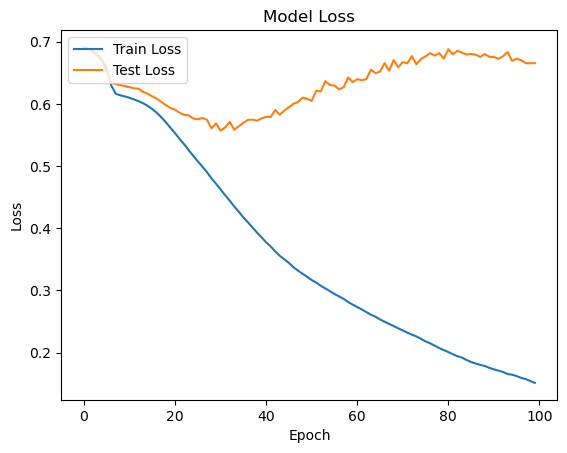

In [140]:
plt.plot(history7.history['loss'])
plt.plot(history7.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train Loss','Test Loss'], loc='upper left')
plt.savefig('OG7lowLRDenseMoreEpochs.png', bbox_inches='tight')
plt.show()


trying early stopping

In [141]:
# build the model
model = Sequential()
model.add(Embedding(5000, 64, input_length=100))
model.add(LSTM(64, dropout=0.2))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer=Adam(learning_rate=0.00001), loss='binary_crossentropy', metrics=['accuracy'])

# Use early stopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)

# Train the model
history8 = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=64, callbacks=[es])


Epoch 1/100
98/98 [==============================] - 6s 47ms/step - loss: 0.6887 - accuracy: 0.6830 - val_loss: 0.6875 - val_accuracy: 0.6665
Epoch 2/100
98/98 [==============================] - 4s 45ms/step - loss: 0.6848 - accuracy: 0.6871 - val_loss: 0.6839 - val_accuracy: 0.6677
Epoch 3/100
98/98 [==============================] - 5s 47ms/step - loss: 0.6804 - accuracy: 0.6873 - val_loss: 0.6796 - val_accuracy: 0.6677
Epoch 4/100
98/98 [==============================] - 4s 44ms/step - loss: 0.6749 - accuracy: 0.6873 - val_loss: 0.6740 - val_accuracy: 0.6677
Epoch 5/100
98/98 [==============================] - 4s 45ms/step - loss: 0.6669 - accuracy: 0.6873 - val_loss: 0.6657 - val_accuracy: 0.6677
Epoch 6/100
98/98 [==============================] - 4s 45ms/step - loss: 0.6546 - accuracy: 0.6873 - val_loss: 0.6521 - val_accuracy: 0.6677
Epoch 7/100
98/98 [==============================] - 5s 47ms/step - loss: 0.6325 - accuracy: 0.6873 - val_loss: 0.6316 - val_accuracy: 0.6677
Epoch 

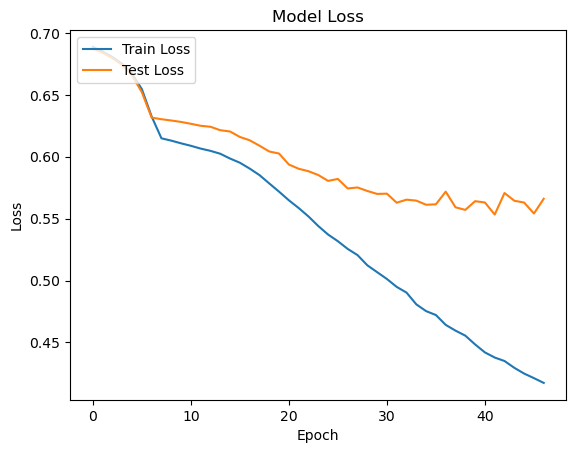

In [142]:
plt.plot(history8.history['loss'])
plt.plot(history8.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train Loss','Test Loss'], loc='upper left')
plt.savefig('OG8earlystopping.png', bbox_inches='tight')
plt.show()


trying chatGPT's simplied model that it recommended to reduce overfitting. 

In [143]:
# Build the model
model = Sequential()
model.add(Embedding(5000, 32, input_length=100))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history9 = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=64)


Epoch 1/50
98/98 [==============================] - 4s 29ms/step - loss: 0.6226 - accuracy: 0.6867 - val_loss: 0.6009 - val_accuracy: 0.6677
Epoch 2/50
98/98 [==============================] - 3s 28ms/step - loss: 0.5007 - accuracy: 0.7521 - val_loss: 0.4913 - val_accuracy: 0.7654
Epoch 3/50
98/98 [==============================] - 3s 27ms/step - loss: 0.3455 - accuracy: 0.8582 - val_loss: 0.4466 - val_accuracy: 0.8111
Epoch 4/50
98/98 [==============================] - 3s 27ms/step - loss: 0.2136 - accuracy: 0.9230 - val_loss: 0.4780 - val_accuracy: 0.8207
Epoch 5/50
98/98 [==============================] - 3s 27ms/step - loss: 0.1444 - accuracy: 0.9529 - val_loss: 0.4872 - val_accuracy: 0.8483
Epoch 6/50
98/98 [==============================] - 3s 27ms/step - loss: 0.0836 - accuracy: 0.9751 - val_loss: 0.5628 - val_accuracy: 0.8483
Epoch 7/50
98/98 [==============================] - 3s 27ms/step - loss: 0.0589 - accuracy: 0.9850 - val_loss: 0.5870 - val_accuracy: 0.8593
Epoch 8/50
98

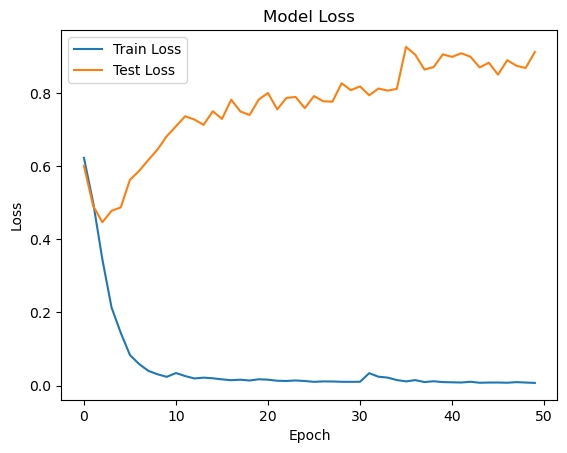

In [144]:
plt.plot(history9.history['loss'])
plt.plot(history9.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train Loss','Test Loss'], loc='upper left')
plt.savefig('OG9simplifiedChatGPT.png', bbox_inches='tight')
plt.show()


going back to the early stopping model, but adding a dense layer

In [145]:
# build the model
model = Sequential()
model.add(Embedding(5000, 64, input_length=100))
model.add(LSTM(64, dropout=0.2))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer=Adam(learning_rate=0.00001), loss='binary_crossentropy', metrics=['accuracy'])

# Use early stopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)

# Train the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=64, callbacks=[es])


Epoch 1/100
98/98 [==============================] - 6s 49ms/step - loss: 0.6929 - accuracy: 0.5328 - val_loss: 0.6913 - val_accuracy: 0.6626
Epoch 2/100
98/98 [==============================] - 4s 46ms/step - loss: 0.6898 - accuracy: 0.6833 - val_loss: 0.6887 - val_accuracy: 0.6677
Epoch 3/100
98/98 [==============================] - 5s 49ms/step - loss: 0.6866 - accuracy: 0.6873 - val_loss: 0.6855 - val_accuracy: 0.6677
Epoch 4/100
98/98 [==============================] - 5s 46ms/step - loss: 0.6827 - accuracy: 0.6873 - val_loss: 0.6816 - val_accuracy: 0.6677
Epoch 5/100
98/98 [==============================] - 4s 46ms/step - loss: 0.6776 - accuracy: 0.6873 - val_loss: 0.6762 - val_accuracy: 0.6677
Epoch 6/100
98/98 [==============================] - 5s 46ms/step - loss: 0.6697 - accuracy: 0.6873 - val_loss: 0.6674 - val_accuracy: 0.6677
Epoch 7/100
98/98 [==============================] - 5s 48ms/step - loss: 0.6544 - accuracy: 0.6873 - val_loss: 0.6468 - val_accuracy: 0.6677
Epoch 

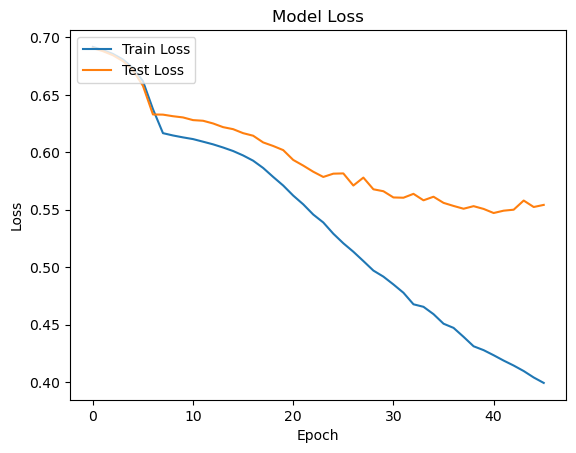

In [146]:
plt.plot(history10.history['loss'])
plt.plot(history10.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train Loss','Test Loss'], loc='upper left')
plt.savefig('OG10DenseEarlyStopping.png', bbox_inches='tight')
plt.show()


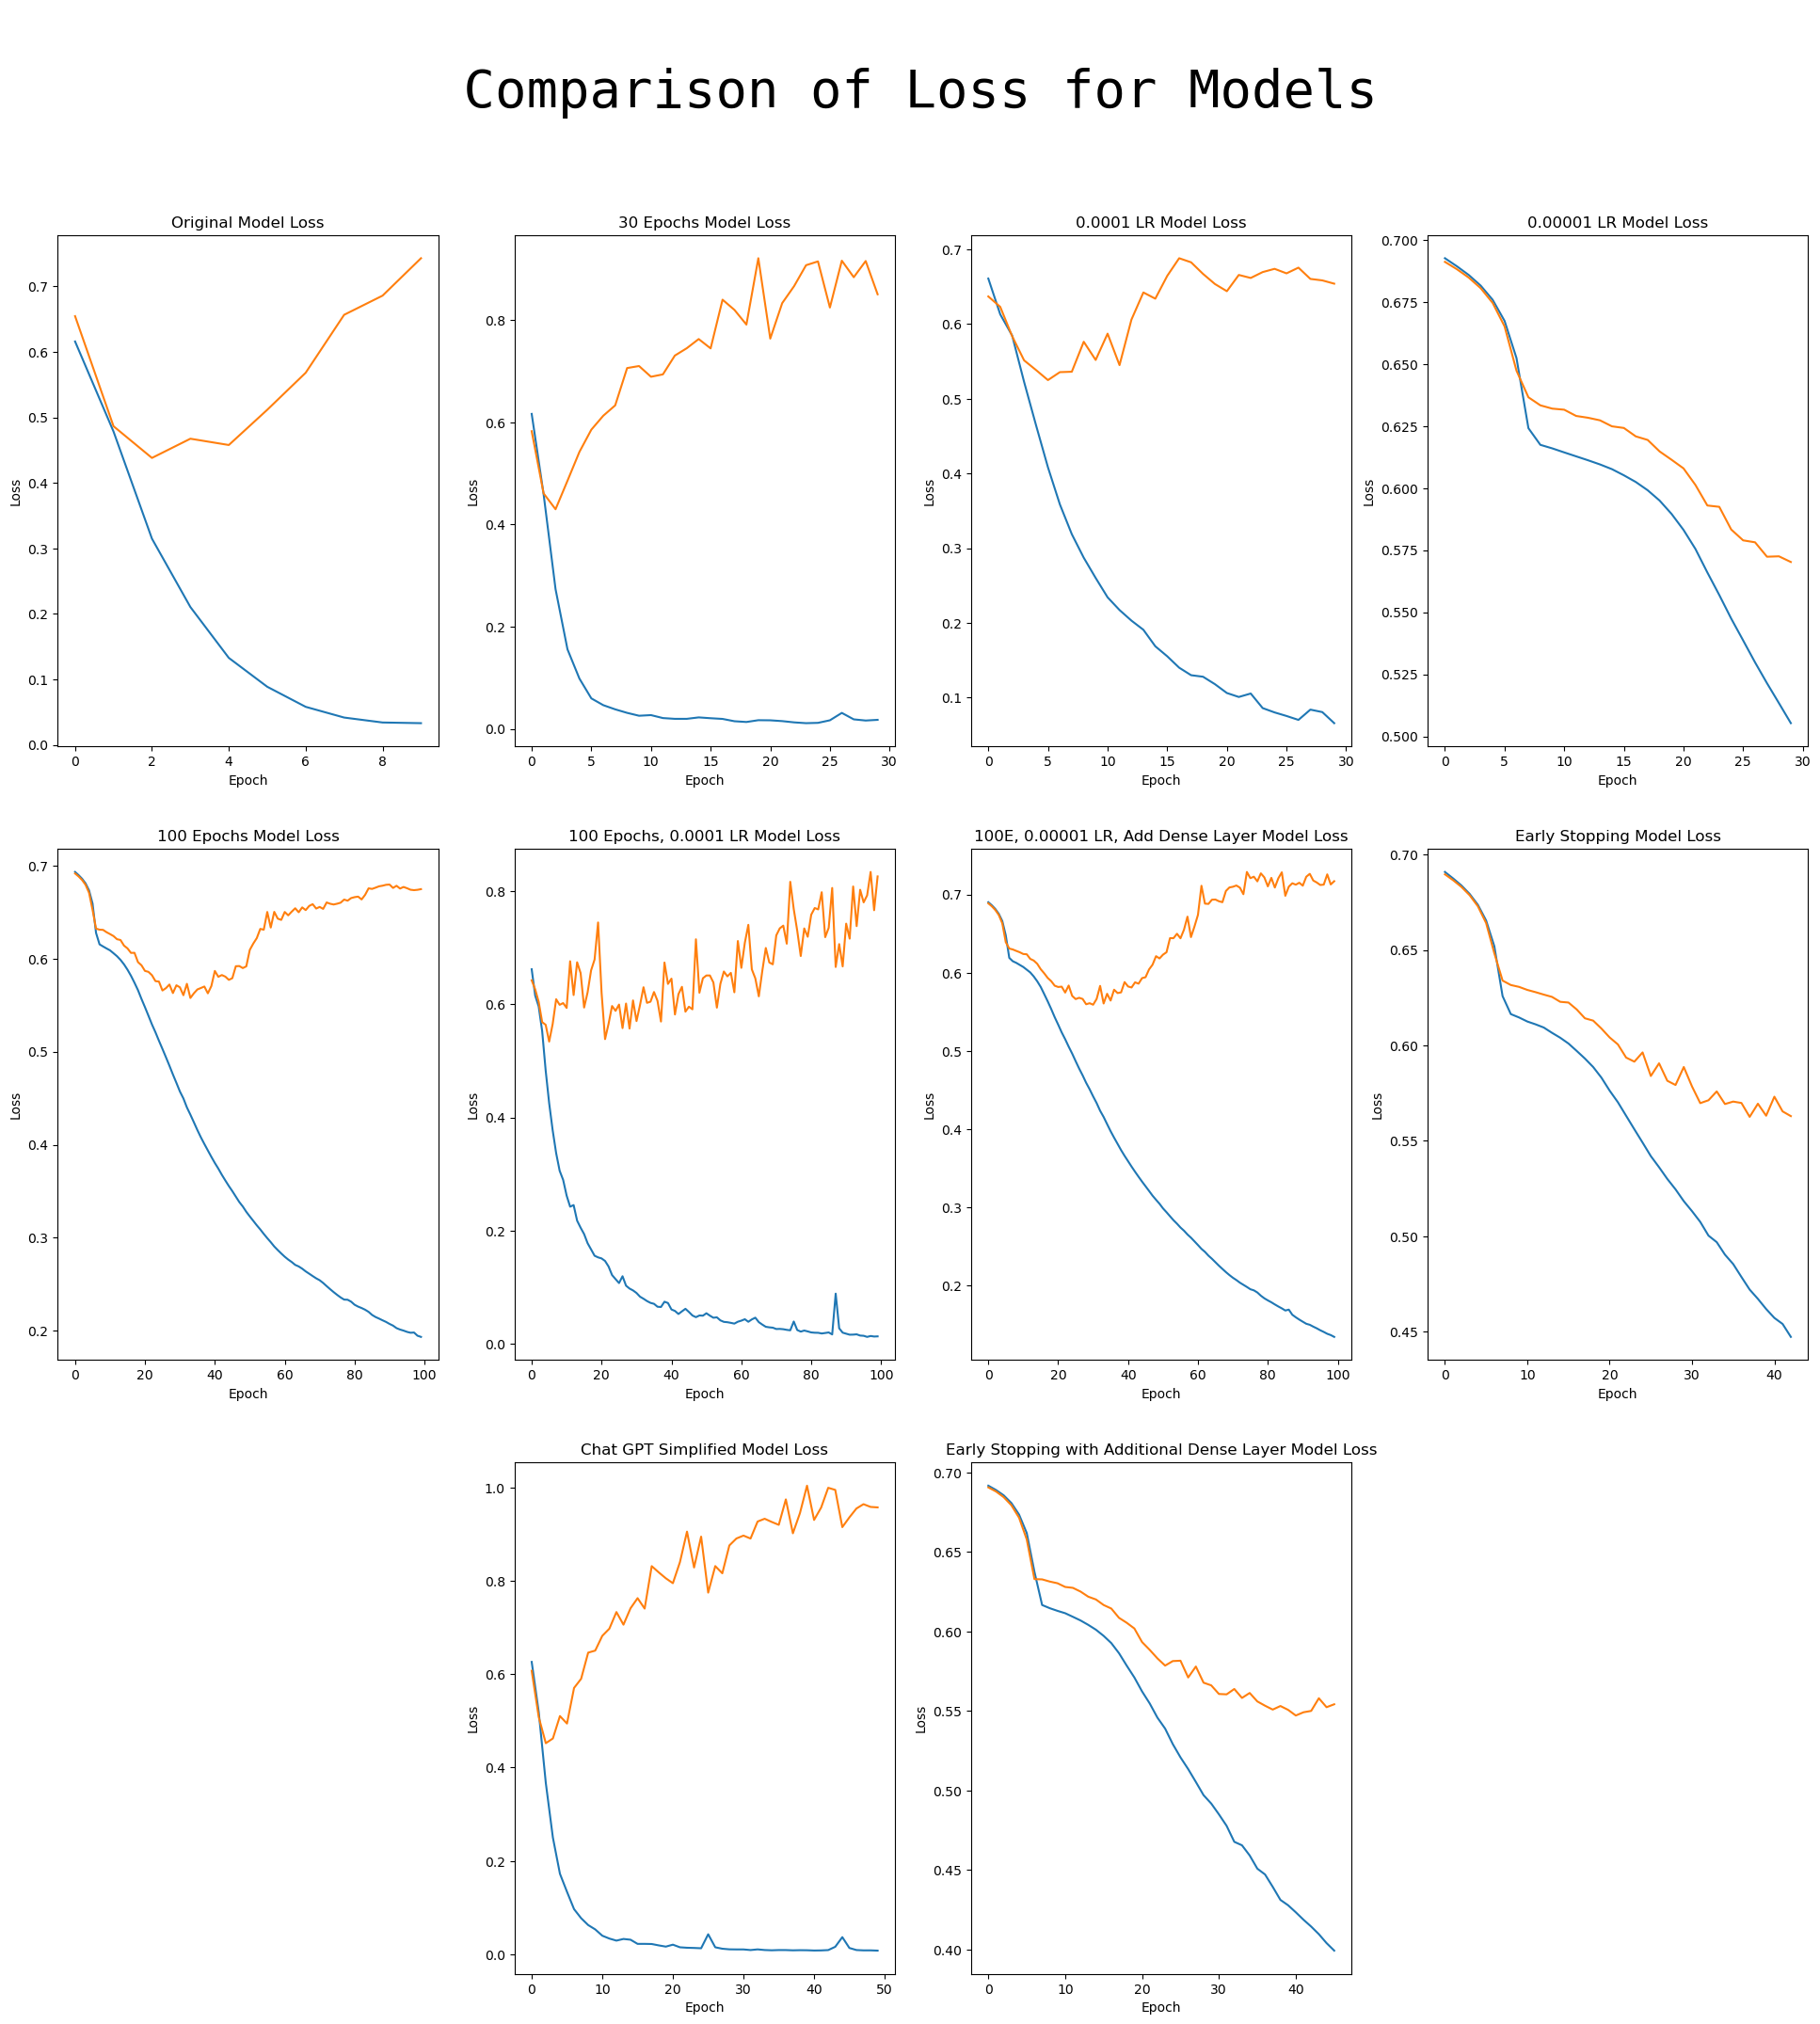

In [94]:
font = {'fontname':'monospace'}

plt.figure(figsize=(24,24))

# fig, ax = plt.subplots(3, 4, figsize=(20,20))
plt.setp(ax, xlim=(0,100), ylim=(0,10))

plt.subplot(3, 4, 1)
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('Original Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
# plt.legend(['Train Loss','Test Loss'], loc='upper left')
# plt.show()

plt.subplot(3, 4, 2)
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('30 Epochs Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
# plt.legend(['Train Loss','Test Loss'], loc='upper left')
# plt.show()

plt.subplot(3, 4, 3)
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.title('0.0001 LR Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
# plt.legend(['Train Loss','Test Loss'], loc='upper left')
# plt.show()

plt.subplot(3, 4, 4)
plt.plot(history4.history['loss'])
plt.plot(history4.history['val_loss'])
plt.title('0.00001 LR Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
# plt.legend(['Train Loss','Test Loss'], loc='upper left')
# plt.show()

plt.subplot(3, 4, 5)
plt.plot(history5.history['loss'])
plt.plot(history5.history['val_loss'])
plt.title('100 Epochs Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
# plt.legend(['Train Loss','Test Loss'], loc='upper left')
# plt.show()

plt.subplot(3, 4, 6)
plt.plot(history6.history['loss'])
plt.plot(history6.history['val_loss'])
plt.title('100 Epochs, 0.0001 LR Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
# plt.legend(['Train Loss','Test Loss'], loc='upper left')
# plt.show()

plt.subplot(3, 4, 7)
plt.plot(history7.history['loss'])
plt.plot(history7.history['val_loss'])
plt.title('100E, 0.00001 LR, Add Dense Layer Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
# plt.legend(['Train Loss','Test Loss'], loc='upper left')
# plt.show()

plt.subplot(3, 4, 8)
plt.plot(history8.history['loss'])
plt.plot(history8.history['val_loss'])
plt.title('Early Stopping Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
# plt.legend(['Train Loss','Test Loss'], loc='upper left')
# plt.show()

plt.subplot(3, 4, 10)
plt.plot(history9.history['loss'])
plt.plot(history9.history['val_loss'])
plt.title('Chat GPT Simplified Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
# plt.legend(['Train Loss','Test Loss'], loc='upper left')
# plt.show()

plt.subplot(3, 4, 11)
plt.plot(history10.history['loss'])
plt.plot(history10.history['val_loss'])
plt.title('Early Stopping with Additional Dense Layer Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
# plt.legend(['Train Loss','Test Loss'], loc='upper left')
# plt.show()

# fig.delaxes(ax[2,1])

plt.suptitle('\n Comparison of Loss for Models', **font, fontsize=40)
plt.savefig('LossComparison.png', bbox_inches='tight')

plt.show()